In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [215]:
df = pd.read_csv("titan_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [217]:
df = df.drop(["PassengerId", "Name","Cabin", "Ticket"], axis=1)
mapping = {'male': 0, 'female': 1}
df = df.replace({'Sex': mapping})

In [218]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [219]:
df= df.fillna(df.groupby(["Pclass", "Sex"]).transform('mean'))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.00,1,0,7.2500,S
1,1,1,1,38.00,1,0,71.2833,C
2,1,3,1,26.00,0,0,7.9250,S
3,1,1,1,35.00,1,0,53.1000,S
4,0,3,0,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,S
887,1,1,1,19.00,0,0,30.0000,S
888,0,3,1,21.75,1,2,23.4500,S
889,1,1,0,26.00,0,0,30.0000,C


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [221]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [222]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.00,1,0,7.2500,S
1,1,1,1,38.00,1,0,71.2833,C
2,1,3,1,26.00,0,0,7.9250,S
3,1,1,1,35.00,1,0,53.1000,S
4,0,3,0,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,S
887,1,1,1,19.00,0,0,30.0000,S
888,0,3,1,21.75,1,2,23.4500,S
889,1,1,0,26.00,0,0,30.0000,C


In [223]:
df = pd.get_dummies(data=df, drop_first=True)

In [224]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.00,1,0,7.2500,0,1
1,1,1,1,38.00,1,0,71.2833,0,0
2,1,3,1,26.00,0,0,7.9250,0,1
3,1,1,1,35.00,1,0,53.1000,0,1
4,0,3,0,35.00,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,0,1
887,1,1,1,19.00,0,0,30.0000,0,1
888,0,3,1,21.75,1,2,23.4500,0,1
889,1,1,0,26.00,0,0,30.0000,0,0


In [225]:
survived = df.pop("Survived")
attributes = df
X_train, X_test, y_train, y_test = train_test_split(attributes,survived)

In [176]:
clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)

In [177]:
clf1.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

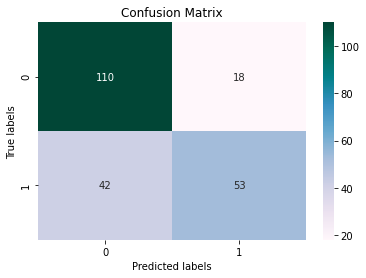

In [178]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(y_test, clf1.predict(X_test))
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); 
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

In [189]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(4, 2), random_state=1,max_iter=10000)

In [190]:
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

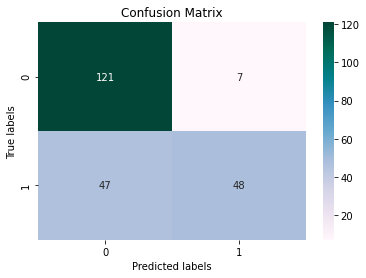

In [191]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(y_test, clf2.predict(X_test))
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); 
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

In [193]:
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(7,), random_state=1,max_iter=10000)

In [194]:
clf3.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(7,), max_iter=10000,
              random_state=1, solver='lbfgs')

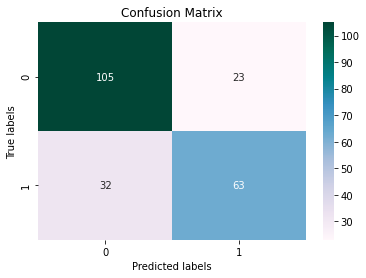

In [195]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
cm = confusion_matrix(y_test, clf3.predict(X_test))
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); 
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["0", "1"]); ax.yaxis.set_ticklabels(["0", "1"]);

In [196]:
dftest = pd.read_csv("titan_test.csv")
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [198]:
dftest = dftest.drop(["PassengerId", "Name","Cabin", "Ticket"], axis=1)
mapping = {'male': 0, 'female': 1}
dftest = dftest.replace({'Sex': mapping})

In [199]:
dftest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,S
416,3,0,NaN,0,0,8.0500,S


In [200]:
dftest= dftest.fillna(df.groupby(["Pclass", "Sex"]).transform('mean'))
dftest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.500000,0,0,7.8292,Q
1,3,1,47.000000,1,0,7.0000,S
2,2,0,62.000000,0,0,9.6875,Q
3,3,0,27.000000,0,0,8.6625,S
4,3,1,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,30.740707,0,0,8.0500,S
414,1,1,39.000000,0,0,108.9000,C
415,3,0,38.500000,0,0,7.2500,S
416,3,0,28.722973,0,0,8.0500,S


In [202]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [203]:
dftest = pd.get_dummies(data=dftest, drop_first=True)
dftest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.500000,0,0,7.8292,1,0
1,3,1,47.000000,1,0,7.0000,0,1
2,2,0,62.000000,0,0,9.6875,1,0
3,3,0,27.000000,0,0,8.6625,0,1
4,3,1,22.000000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,30.740707,0,0,8.0500,0,1
414,1,1,39.000000,0,0,108.9000,0,0
415,3,0,38.500000,0,0,7.2500,0,1
416,3,0,28.722973,0,0,8.0500,0,1


In [204]:
clf2.predict(dftest)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [205]:
dffinal = pd.read_csv("titan_test.csv")
dffinal.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [212]:
dfsub = pd.DataFrame()
dfsub["PassengerId"] = dffinal["PassengerId"]
dfsub["Survived"] = clf2.predict(dftest)


In [213]:
dfsub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [214]:
dfsub.to_csv("titansub.csv", index =False)
